In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | torbay
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | morondava
Processing Record 6 of Set 1 | katsuura
Processing Record 7 of Set 1 | port-gentil
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | vilcun
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | yeppoon
Processing Record 12 of Set 1 | chinhoyi
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | cidreira
Processing Record 16 of Set 1 | east london
Processing Record 17 of Set 1 | chokurdakh
Processing Record 18 of Set 1 | samusu
City not found. Skipping...
Processing Record 19 of Set 1 | el tigre
Processing Record 20 of Set 1 | ugoofaaru
Processing Record 21 of Set 1 | puerto carreno
Processing Record 2

Processing Record 36 of Set 4 | urucara
Processing Record 37 of Set 4 | zunheboto
Processing Record 38 of Set 4 | cape town
Processing Record 39 of Set 4 | tiarei
Processing Record 40 of Set 4 | kyabe
Processing Record 41 of Set 4 | chuy
Processing Record 42 of Set 4 | eirunepe
Processing Record 43 of Set 4 | bethel
Processing Record 44 of Set 4 | mabaruma
Processing Record 45 of Set 4 | urubicha
Processing Record 46 of Set 4 | tasiilaq
Processing Record 47 of Set 4 | matara
Processing Record 48 of Set 4 | dzaoudzi
Processing Record 49 of Set 4 | suntar
Processing Record 50 of Set 4 | ancud
Processing Record 1 of Set 5 | port blair
Processing Record 2 of Set 5 | isangel
Processing Record 3 of Set 5 | sakakah
Processing Record 4 of Set 5 | tarudant
City not found. Skipping...
Processing Record 5 of Set 5 | oranjemund
Processing Record 6 of Set 5 | pevek
Processing Record 7 of Set 5 | elat
Processing Record 8 of Set 5 | warqla
City not found. Skipping...
Processing Record 9 of Set 5 | so

Processing Record 25 of Set 8 | dunedin
Processing Record 26 of Set 8 | hayden
Processing Record 27 of Set 8 | poya
Processing Record 28 of Set 8 | at-bashi
Processing Record 29 of Set 8 | airai
Processing Record 30 of Set 8 | zhigansk
Processing Record 31 of Set 8 | tricase
Processing Record 32 of Set 8 | baruun-urt
Processing Record 33 of Set 8 | dongzhen
Processing Record 34 of Set 8 | vaghodia
Processing Record 35 of Set 8 | kollam
Processing Record 36 of Set 8 | dingzhou
Processing Record 37 of Set 8 | kavieng
Processing Record 38 of Set 8 | challans
Processing Record 39 of Set 8 | lagoa
Processing Record 40 of Set 8 | ridgecrest
Processing Record 41 of Set 8 | vila franca do campo
Processing Record 42 of Set 8 | laguna
Processing Record 43 of Set 8 | chimore
Processing Record 44 of Set 8 | vilyuysk
Processing Record 45 of Set 8 | esperance
Processing Record 46 of Set 8 | black river
Processing Record 47 of Set 8 | chapleau
Processing Record 48 of Set 8 | tiruvottiyur
City not fou

Processing Record 16 of Set 12 | kamaishi
Processing Record 17 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 18 of Set 12 | tiznit
Processing Record 19 of Set 12 | grand river south east
City not found. Skipping...
Processing Record 20 of Set 12 | lubbock
Processing Record 21 of Set 12 | shizilu
Processing Record 22 of Set 12 | progreso
Processing Record 23 of Set 12 | ust-bolsheretsk
City not found. Skipping...
Processing Record 24 of Set 12 | srednekolymsk
Processing Record 25 of Set 12 | lobva
Processing Record 26 of Set 12 | hasanabad
Processing Record 27 of Set 12 | kitgum
Processing Record 28 of Set 12 | praxedis guerrero
Processing Record 29 of Set 12 | krasnovishersk
Processing Record 30 of Set 12 | balikpapan
Processing Record 31 of Set 12 | garissa
Processing Record 32 of Set 12 | otane
Processing Record 33 of Set 12 | curvelo
Processing Record 34 of Set 12 | xinxiang
Processing Record 35 of Set 12 | buraydah
Processing Record 36 of Set 12 | lata
Processing Record 3

In [10]:
len(city_data)

574

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Torbay,47.6666,-52.7314,68.88,95,75,6.91,CA,2021-07-21 13:00:05
1,Yellowknife,62.4560,-114.3525,62.29,82,66,5.99,CA,2021-07-21 13:00:07
2,Jamestown,42.0970,-79.2353,67.32,92,90,3.00,US,2021-07-21 13:00:08
3,Morondava,-20.2833,44.2833,78.71,67,1,12.71,MG,2021-07-21 13:00:11
4,Katsuura,35.1333,140.3000,82.11,88,9,5.91,JP,2021-07-21 13:00:12
5,Port-Gentil,-0.7193,8.7815,75.67,81,96,13.96,GA,2021-07-21 13:00:13
6,Hilo,19.7297,-155.0900,72.81,89,100,2.68,US,2021-07-21 13:00:13
7,Vilcun,-38.6500,-72.2333,45.64,83,100,2.39,CL,2021-07-21 13:00:14
8,Busselton,-33.6500,115.3333,51.08,81,88,9.17,AU,2021-07-21 13:00:15
9,Yeppoon,-23.1333,150.7333,53.38,45,0,11.34,AU,2021-07-21 13:00:16


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Torbay,CA,2021-07-21 13:00:05,47.6666,-52.7314,68.88,95,75,6.91
1,Yellowknife,CA,2021-07-21 13:00:07,62.4560,-114.3525,62.29,82,66,5.99
2,Jamestown,US,2021-07-21 13:00:08,42.0970,-79.2353,67.32,92,90,3.00
3,Morondava,MG,2021-07-21 13:00:11,-20.2833,44.2833,78.71,67,1,12.71
4,Katsuura,JP,2021-07-21 13:00:12,35.1333,140.3000,82.11,88,9,5.91
5,Port-Gentil,GA,2021-07-21 13:00:13,-0.7193,8.7815,75.67,81,96,13.96
6,Hilo,US,2021-07-21 13:00:13,19.7297,-155.0900,72.81,89,100,2.68
7,Vilcun,CL,2021-07-21 13:00:14,-38.6500,-72.2333,45.64,83,100,2.39
8,Busselton,AU,2021-07-21 13:00:15,-33.6500,115.3333,51.08,81,88,9.17
9,Yeppoon,AU,2021-07-21 13:00:16,-23.1333,150.7333,53.38,45,0,11.34


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

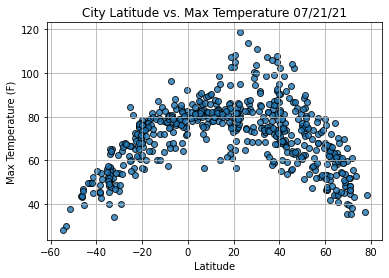

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

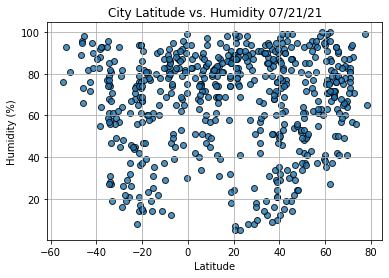

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

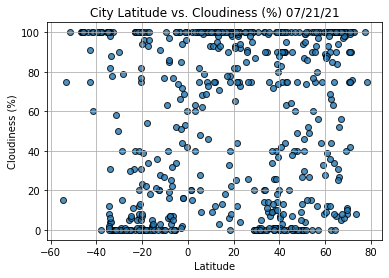

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

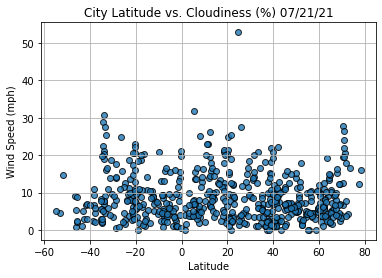

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()